# A-wine-quality-prediction-model-evaluation

### Contexte

Ce dataset contient des informations physico-chimiques de vins portugais ainsi que leur qualité telle que notée par des humains.Le but de ce code est de prédire automatiquement la qualité du vin sur la base de ces informations afin d’améliorer la production de vin, et de cibler le goût des consommateurs sur des marchés de niche. Par la suite nous allons évaluer ce modèle et le comparer à différents algorithmes pour ainsi juger de la pertinence de notre modèle.

### Bibliothèques

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, neighbors, metrics, linear_model

### Data Exploration

In [13]:
data = pd.read_csv("winequality-white.csv", sep=";")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.shape

(4898, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

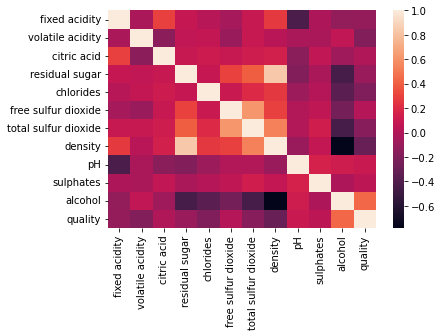

In [14]:
sns.heatmap(data.corr())

In [10]:
y = data['quality']
X = data.drop('quality', axis=1)
print('\n', y.shape, X.shape)


 (4898,) (4898, 11)


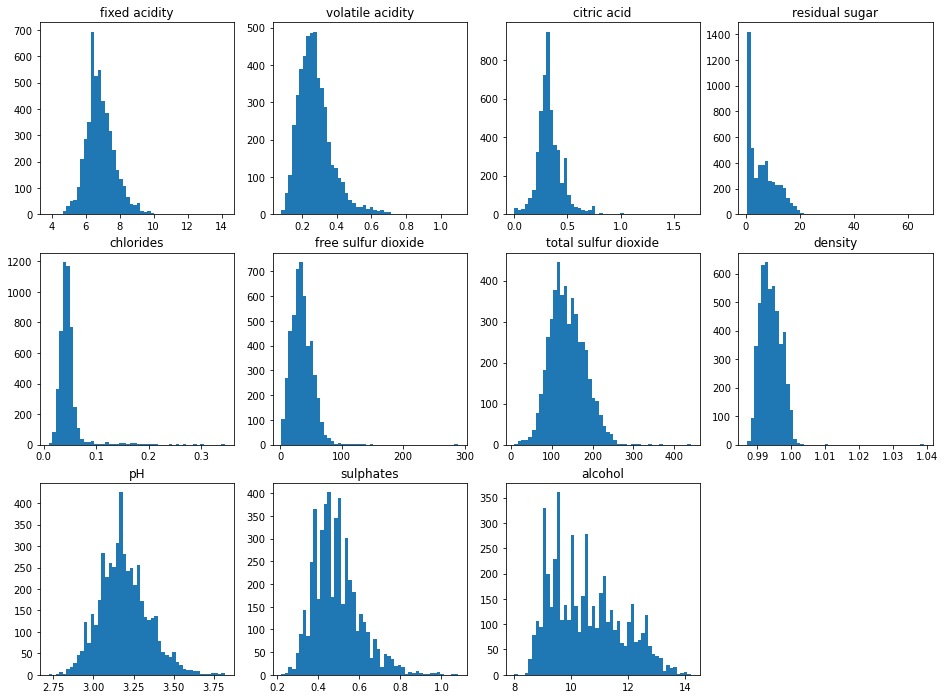

In [17]:
plt.figure(figsize=(16, 12))
for name, i in zip(data.columns, range(X.shape[1])): 
    plt.subplot(3, 4, i+1)
    plt.hist(X.iloc[:, i], bins=50)
    plt.title(name)


### Data Preprocessing

Normalisation 

MinMaxScaler -> placer entre 0 et 1 (X-Xmin)/(Xmax-Xmin) mais il faut enlever les outliers avant
StandardScaler -> centrée et réduire (X-mean(X))/std(X) mais il faut enlever les outliers avant
RobustScaler -> rend moins sensible aux outliers (X-mediane)/IQR

un_transformer.inverse_transform(np.array) -> repasser à l'échelle réelle

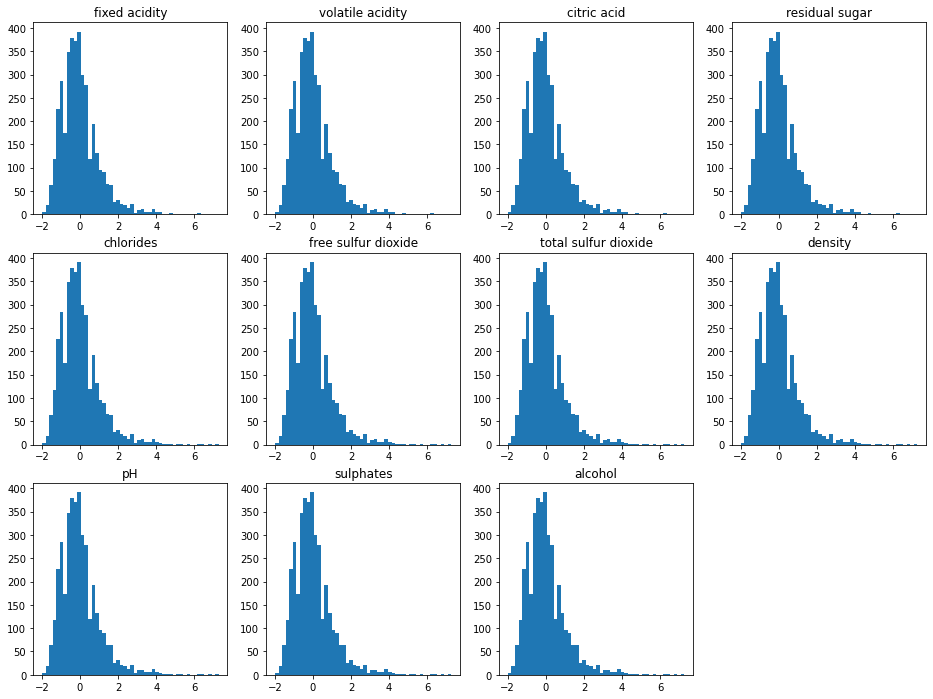

In [18]:
# Pour séparer les vins en 2
y_class = np.where(y<6, 0, 1)

# Sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class,
                                                                  test_size=0.2)

# Transformer 
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

plt.figure(figsize=(16, 12))
for name, i in zip(data.columns, range(X_train_std.shape[1])): 
    plt.subplot(3,4,i+1)
    plt.hist(X_train_std[:, 1], bins=50)
    plt.title(name)
plt.show()

### Cross Validation & Data Modeling

In [19]:
knn_score = model_selection.cross_val_score(neighbors.KNeighborsClassifier(), 
                                X_train_std, y_train, 
                                cv=5, 
                                scoring='accuracy')

sgdc_score = model_selection.cross_val_score(linear_model.SGDClassifier(), 
                                X_train_std, y_train, 
                                cv=5, 
                                scoring='accuracy')

print('\nKnn score:', knn_score.mean())
print('Sgdc score:', sgdc_score.mean())


Knn score: 0.7641635389788101
Sgdc score: 0.7238430812938202


In [20]:
# Estimator
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train_std, y_train)

print('\nTrain score:',knn.score(X_train_std, y_train))
print('Test score:',knn.score(X_test_std, y_test))


Train score: 0.8425216947422154
Test score: 0.7581632653061224


### GridSearchCV 

In [21]:
param_grid = {'n_neighbors': np.arange(1,20),
              'metric': ['euclidean', 'manhattan']}

grid = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), 
    param_grid,     
    cv=5,           
    scoring='accuracy')

grid.fit(X_train_std, y_train)

print('\nGridSearchCV best score:', grid.best_score_)
print('GridSearchCV best params:', grid.best_params_)
print('GridSearchCV best estimators:', grid.best_estimator_)

best_knn = grid.best_estimator_

print('\n\nTest score sans GridSearchCV:', knn.score(X_test_std, y_test))
print('Test score avec GridSearchCV:', best_knn.score(X_test_std, y_test))


GridSearchCV best score: 0.7853487371960279
GridSearchCV best params: {'metric': 'euclidean', 'n_neighbors': 1}
GridSearchCV best estimators: KNeighborsClassifier(metric='euclidean', n_neighbors=1)


Test score sans GridSearchCV: 0.7581632653061224
Test score avec GridSearchCV: 0.7918367346938775


### Confusion Matrix (montrer les erreurs de prédiction)

In [22]:
metrics.confusion_matrix(y_test, best_knn.predict(X_test_std))

array([[222, 119],
       [ 85, 554]], dtype=int64)

### Metrics (analyse des erreurs)

In [23]:
print('\nMAE:', metrics.mean_absolute_error(y_test, best_knn.predict(X_test_std)))


MAE: 0.20816326530612245


### Learning Curve (évolution des erformances en fonction de la quantité de données)

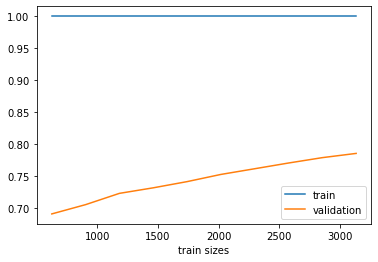

In [24]:
N, train_score, val_score = model_selection.learning_curve(best_knn, 
                               X_train_std, y_train, 
                               train_sizes= np.linspace(0.2, 1, 10),
                               cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()
plt.show()